 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sn
from pathlib import Path


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_returns_csv = Path(r"E:\OneDrive\Documents\GitHub\Whale Portfolio\Starter_Code\Resources\whale_returns.csv")
whale_daily_returns = pd.read_csv(whale_returns_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
whale_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_daily_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_daily_returns.dropna(inplace=True)
whale_daily_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path (r"E:\OneDrive\Documents\GitHub\Whale Portfolio\Starter_Code\Resources\algo_returns.csv")

algo_returns = pd.read_csv(algo_returns_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)

algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

In [8]:
algo_returns.head()
                 

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path(r"E:\OneDrive\Documents\GitHub\Whale Portfolio\Starter_Code\Resources\sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_history.sort_index(ascending = True, inplace = True)
sp_tsx_history.head()

,Close
Date,
2012-10-01,"12,370.19"
2012-10-02,"12,391.23"
2012-10-03,"12,359.47"
2012-10-04,"12,447.68"
2012-10-05,"12,418.99"


In [10]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace(',','')
sp_tsx_history["Close"] = sp_tsx_history["Close"].astype("float")


In [12]:
sp_tsx_history.dtypes

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx_history.pct_change()
sp_tsx_returns.head(100)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2013-02-15,-0.002764
2013-02-19,0.009741
2013-02-20,-0.007507


In [14]:
# Drop nulls
sp_tsx_returns.dropna(inplace=True)
sp_tsx_returns.head(100)

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2013-02-19,0.009741
2013-02-20,-0.007507
2013-02-21,-0.005827


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns = sp_tsx_returns.rename(columns={"Close": "SP_TSX"})
sp_tsx_returns.head(100)

,SP_TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2013-02-19,0.009741
2013-02-20,-0.007507
2013-02-21,-0.005827


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_daily_returns, algo_returns, sp_tsx_returns], axis="columns", join="inner")
combined_df.head(100)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2015-07-21,0.000868,0.000731,-0.006046,-0.001678,0.000069,-0.004192,-0.003418
2015-07-22,-0.002053,-0.001338,0.001271,0.001726,-0.011107,0.001177,-0.004808
2015-07-23,0.002768,-0.001677,-0.002090,-0.010946,-0.000997,-0.007481,-0.002918


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'daily returns of all portfolios'}, xlabel='Date'>

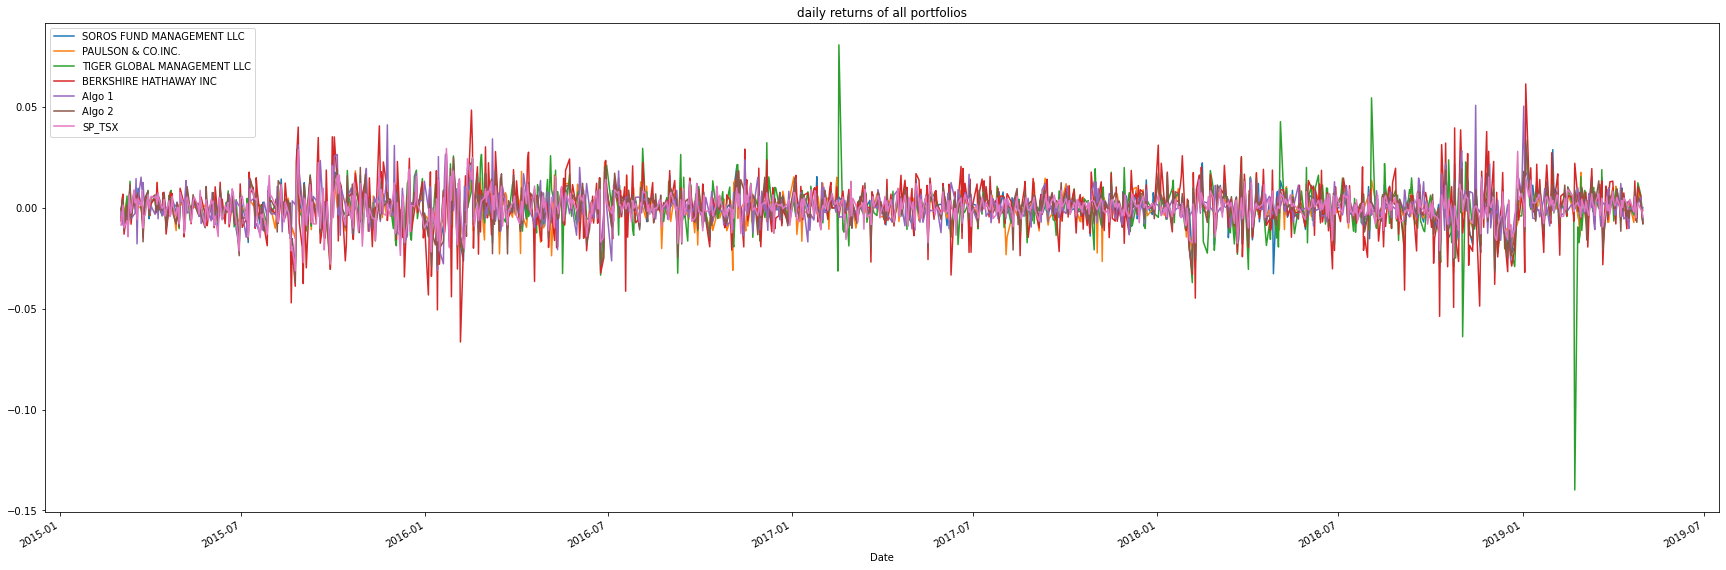

In [17]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(30,10), title = "daily returns of all portfolios")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'cumulative returns'}, xlabel='Date'>

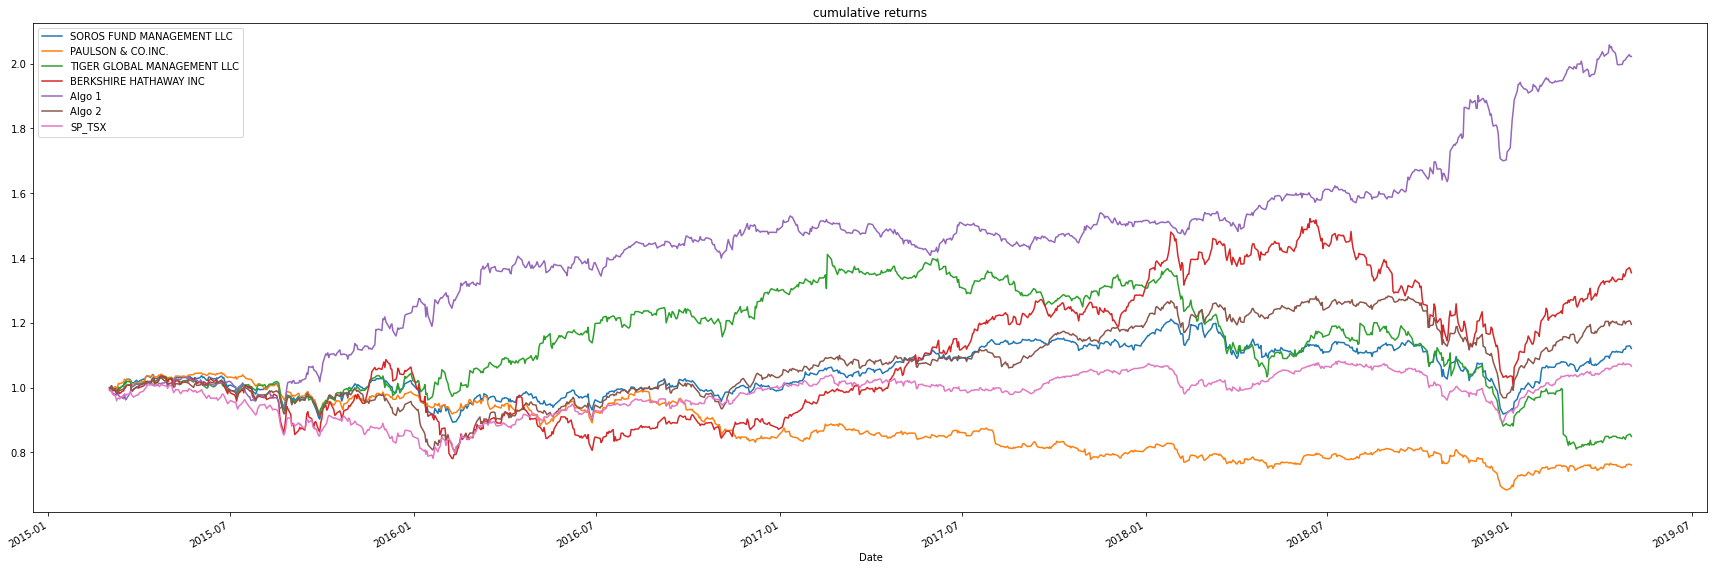

In [18]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod()

# Plot cumulative returns

cumulative_returns.plot(figsize = (30,10), title = "cumulative returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk visualization'}>

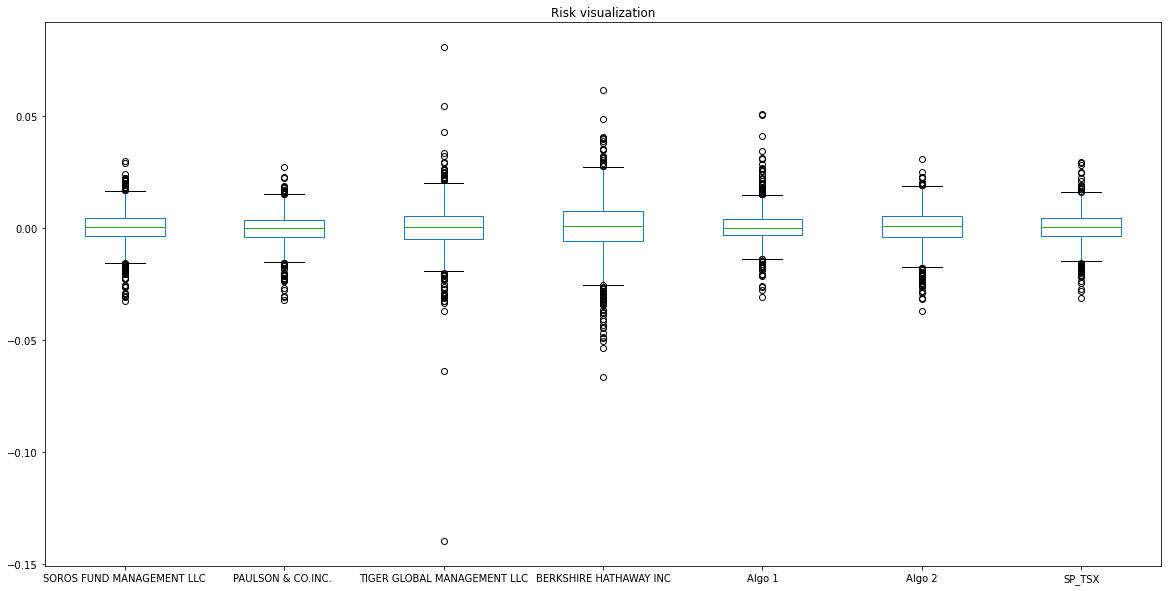

In [19]:
# Box plot to visually show risk
combined_df.plot(kind = "box", figsize=(20,10), title = "Risk visualization")

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
standev_portfolio = combined_df.std()
standev_portfolio

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP_TSX                         0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Calculate  the daily standard deviation of S&P TSX 60

standev_sp_tsx = standev_portfolio[-1]
standev_sp_tsx


0.007034167748577725

In [22]:
# Determine which portfolios are riskier than the S&P TSX 60


standev_portfolio.to_frame()
standev_portfolio.apply (lambda x : True if x > standev_sp_tsx else False )


SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
SP_TSX                         False
dtype: bool

In [23]:
## Answer: Riskier portfolio include: 
### SOROS FUND MANAGEMENT LLC, 
### TIGER GLOBAL MANAGEMENT LLC, 
### BERKSHIRE HATHAWAY INC,
### Algo 1 
### Algo 2 


### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)

annualized_standev = standev_portfolio * np.sqrt (252)
annualized_standev


SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SP_TSX                         0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

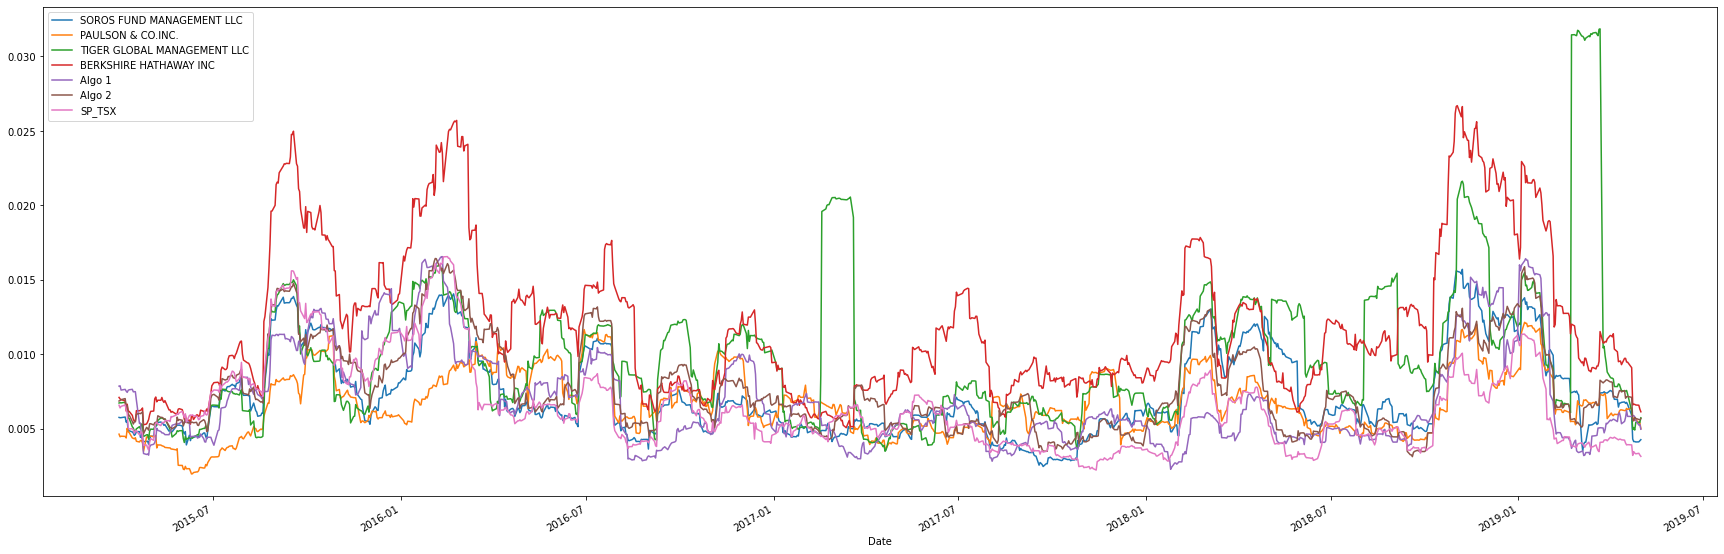

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combined_rolling = combined_df.rolling(window = 21).std()

# Plot the rolling standard deviation

combined_rolling.plot(figsize = (30,10))


### Calculate and plot the correlation

<AxesSubplot:>

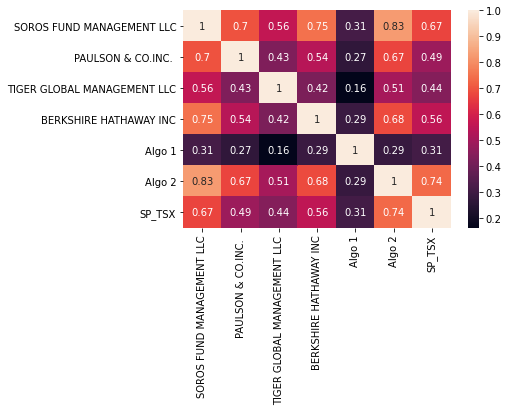

In [26]:
# Calculate the correlation

correlation = combined_df.corr()

# Display the correlation matrix

sn.heatmap(correlation, annot=True)


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [27]:
# Calculate covariance of a single portfolio

portfolio_covariance = combined_df["TIGER GLOBAL MANAGEMENT LLC"].cov(combined_df["SP_TSX"])
print(f"covariance of a single portfolio: {portfolio_covariance}")

# Calculate variance of S&P TSX

portfolio_variance = combined_df["SP_TSX"].var()
print(f"variance of S&P TSX: {portfolio_variance}")

# Computing beta

portfolio_beta = portfolio_covariance / portfolio_variance
print(f"beta: {portfolio_beta}")


covariance of a single portfolio: 3.372724149435511e-05
variance of S&P TSX: 4.9479515915131015e-05
beta: 0.6816404904244667


<AxesSubplot:title={'center':'TIGER GLOBAL MANAGEMENT LLC Beta'}, xlabel='Date'>

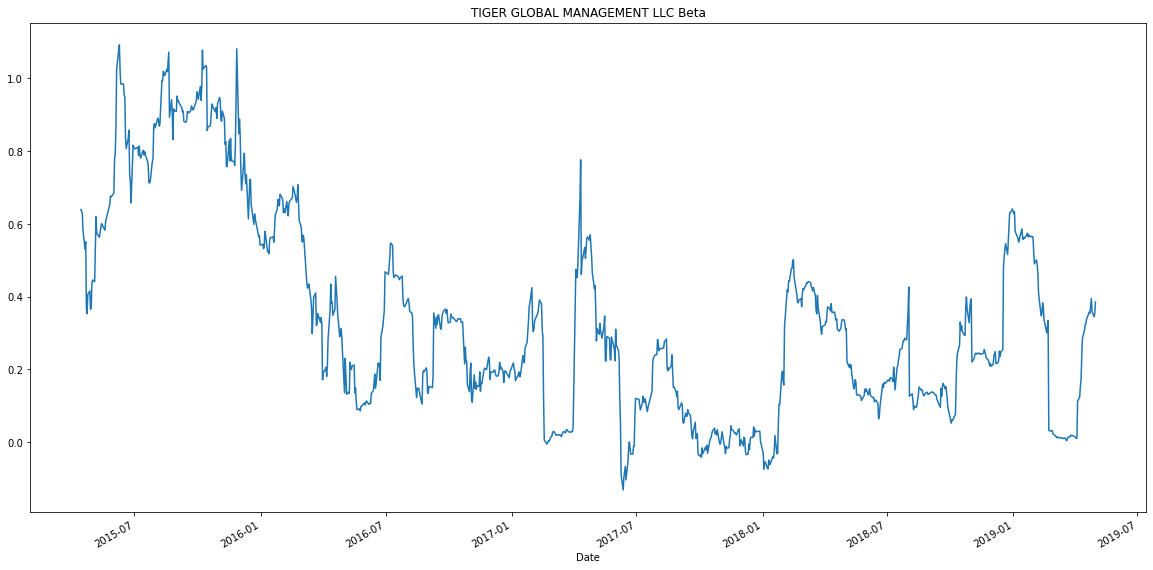

In [28]:
# Plot beta trend

rolling_covariance = combined_df["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=30).cov(combined_df["SP_TSX"])
rolling_variance = combined_df["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=30).var()
rolling_beta = rolling_covariance/rolling_variance
rolling_beta.plot(figsize=(20, 10), title='TIGER GLOBAL MANAGEMENT LLC Beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [29]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21)

ExponentialMovingWindow [com=29.799346392775035,min_periods=1,adjust=True,ignore_na=False,axis=0]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252 ) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP_TSX                         0.195550
dtype: float64

<AxesSubplot:>

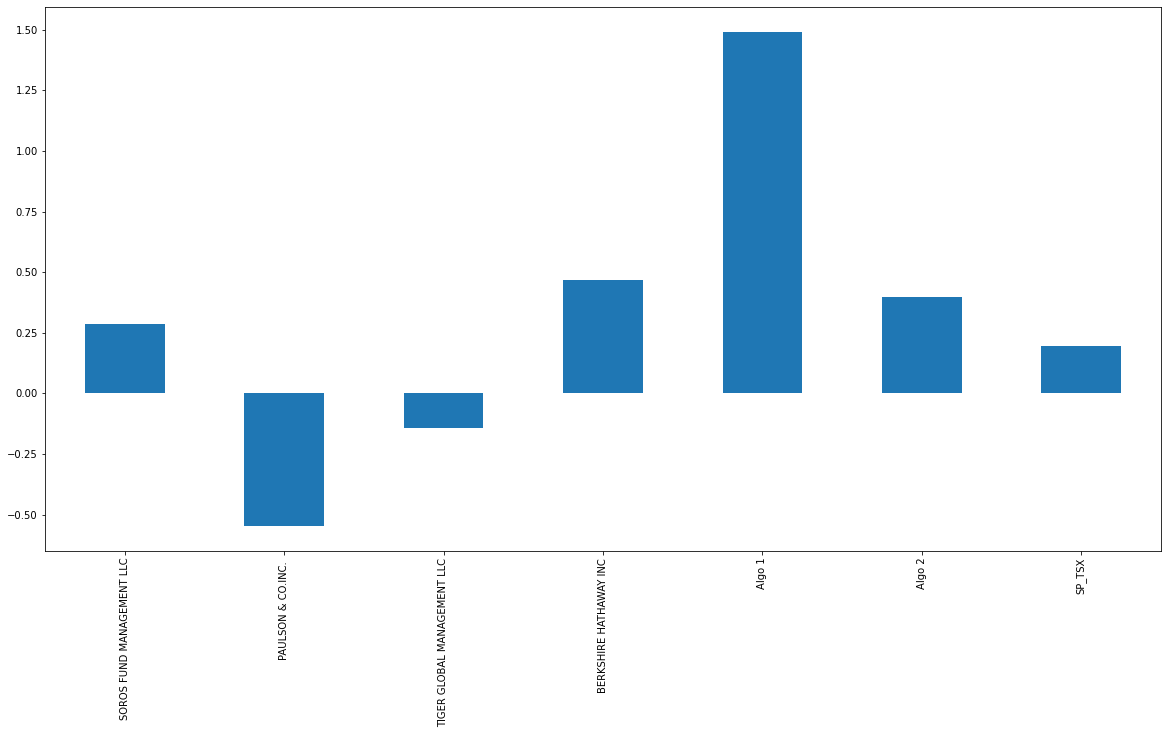

In [31]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize=(20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo 1 outperformed the S&P TSX 60. Algo 2 also outperformed the S&P TSX 60 but underperformed Berkshire Hathaway. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [32]:
# Reading data from 1st stock
Shopify_data = Path(r"E:\OneDrive\Documents\GitHub\Whale Portfolio\Starter_Code\Resources\shop_historical.csv")
Shopify_data = pd.read_csv(Shopify_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
Shopify_data.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [33]:
# Reading data from 2nd stock
Otex_data = Path(r"E:\OneDrive\Documents\GitHub\Whale Portfolio\Starter_Code\Resources\otex_historical.csv")
Otex_data = pd.read_csv(Otex_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
Otex_data.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [34]:
# Reading data from 3rd stock
L_data = Path(r"E:\OneDrive\Documents\GitHub\Whale Portfolio\Starter_Code\Resources\l_historical.csv")
L_data = pd.read_csv(L_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
L_data.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [35]:
# Combine all stocks in a single DataFrame
combined_stocks_df = pd.concat([Otex_data, Shopify_data, L_data], axis="rows",join="outer")
combined_stocks_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [36]:
# Reset Date index
combined_stocks_df.reset_index()

,Date,Symbol,Close
0,2018-01-02,OTEX,43.58
1,2018-01-03,OTEX,43.07
2,2018-01-04,OTEX,42.91
3,2018-01-05,OTEX,42.57
4,2018-01-08,OTEX,42.16
...,...,...,...
1498,2019-12-20,L,67.90
1499,2019-12-23,L,67.68
1500,2019-12-24,L,67.67
1501,2019-12-27,L,67.78


In [37]:
# Reorganize portfolio data by having a column per symbol

combined_stocks_df = combined_stocks_df.pivot(columns='Symbol', values='Close')
combined_stocks_df.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [38]:
# Calculate daily returns
combined_stocks_returns = combined_stocks_df.pct_change()

# Drop NAs
combined_stocks_returns.dropna(inplace=True)

# Display sample data
combined_stocks_returns.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
combined_stocks_weightedR = combined_stocks_returns.dot(weights)
# Display sample data
combined_stocks_weightedR.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [46]:
# Join your returns DataFrame to the original returns DataFrame
joint_portfolio_returns = pd.concat([combined_df, combined_stocks_weightedR], axis = "columns", join="inner")
x = joint_portfolio_returns.columns[-1]
joint_portfolio_returns = joint_portfolio_returns.rename(columns={x:"My_Portfolio"})
joint_portfolio_returns.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP_TSX', 'My_Portfolio'],
      dtype='object')

In [47]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joint_portfolio_returns.isnull()
joint_portfolio_returns.dropna(axis=0, how="any", inplace=True)
joint_portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX,My_Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [48]:
# Calculate the annualized `std`

joint_standev = joint_portfolio_returns.std() * np.sqrt (252)
joint_standev


SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
SP_TSX                         0.099121
My_Portfolio                   0.224346
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

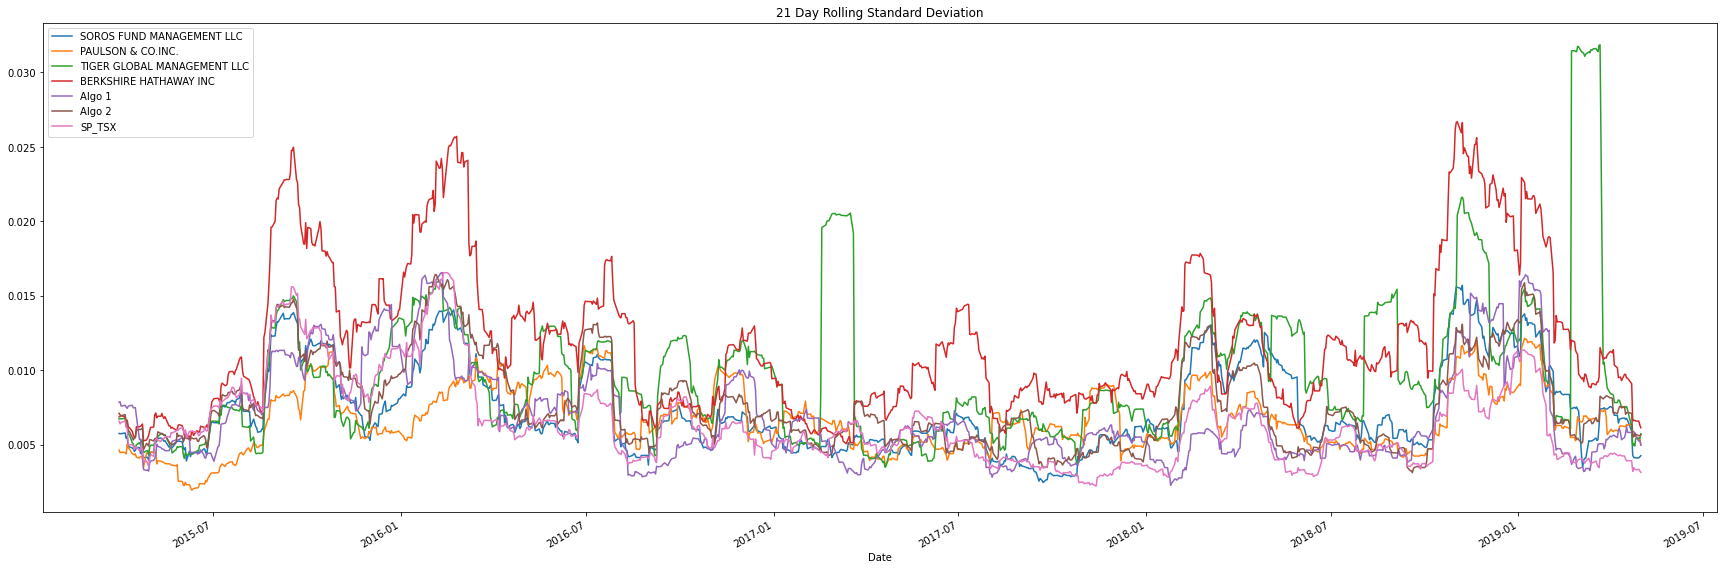

In [49]:
# Calculate rolling standard deviation

joint_standev_rolling = joint_standev.rolling(window = 21).std()

# Plot rolling standard deviation
combined_rolling.plot(figsize = (30,10), title="21 Day Rolling Standard Deviation")

### Calculate and plot the correlation

<AxesSubplot:>

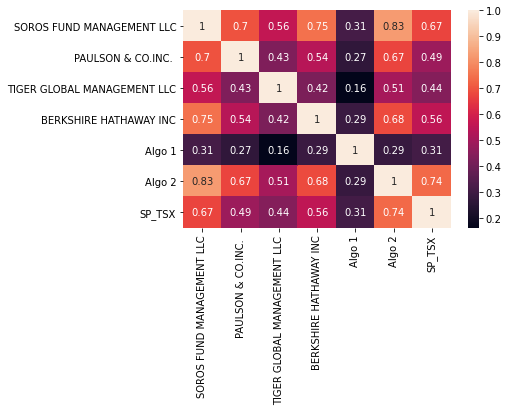

In [45]:
# Calculate and plot the correlation

joint_portfolio_returns.corr()

sn.heatmap(correlation, annot=True)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'60-day Rolling Beta for My Portfolio'}, xlabel='Date'>

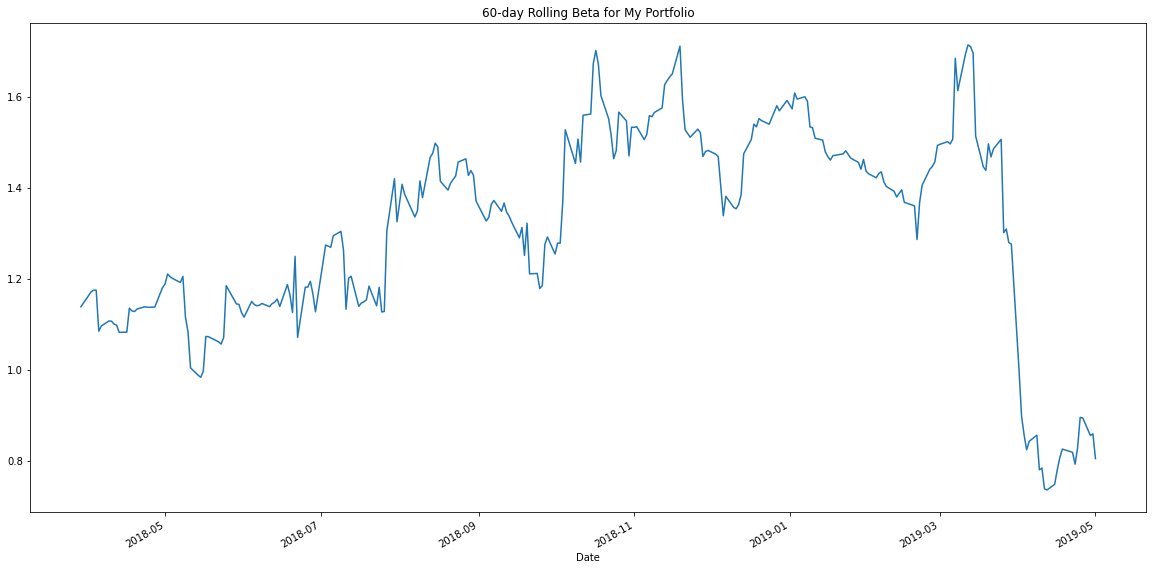

In [52]:
# Calculate and plot Beta

second_rolling_covariance = joint_portfolio_returns["My_Portfolio"].rolling(window=60).cov(joint_portfolio_returns["SP_TSX"])
second_rolling_variance = joint_portfolio_returns["SP_TSX"].rolling(window=60).var()
second_rolling_beta = second_rolling_covariance/second_rolling_variance
second_rolling_beta.plot(figsize=(20,10), title="60-day Rolling Beta for My Portfolio")


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [59]:
# Calculate Annualized Sharpe Ratios
Sharpe_joint_portfolio = joint_portfolio_returns.mean() * 252 / (joint_portfolio_returns.std() * np.sqrt(252))
Sharpe_joint_portfolio = Sharpe_joint_portfolio.sort_values(ascending=False) 

Sharpe_joint_portfolio


Algo 1                         1.901461
My_Portfolio                   1.564547
BERKSHIRE HATHAWAY INC         0.195907
SP_TSX                         0.034651
Algo 2                         0.021394
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios Visualization'}>

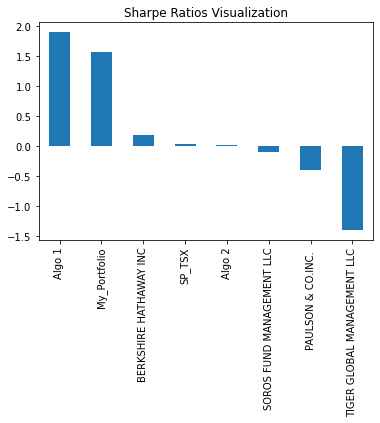

In [60]:
# Visualize the sharpe ratios as a bar plot
Sharpe_joint_portfolio.plot(kind = "bar", title = "Sharpe Ratios Visualization")

### How does your portfolio do?

Write your answer here!

In [61]:
#not enough YOLO stonks in comparison to Algo 1, but still beaten Warren Buffett and other legend investors.